# Predict automobile price using Machine Learning


## Objective

Use Machine learning to predict the price of a car based on several characteristics. The objective is to
build a model to understand the factors that drive the price of the car. This will help your automobile
company launch their new car in the market effectively by pricing it better.

## Data Description and Attribute Information

><br>- $symboling$ : -3, -2, -1, 0, 1, 2, 3
(Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less),
this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A
value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.)
 <br>- $make$ : alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes- benz,
mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen,
volvo <br>- $fueltype$ :  diesel, gas <br>- $aspiration$ : std, turbo <br>- $doornumber$ : no.of doors of vehicle four, two <br>- $carbody$ : style of body hardtop, wagon, sedan, hatchback, convertible <br>- $drivewheel$ : 4wd, fwd, rwd<br>- $enginelocation$ : front, rear <br>- $wheelbase$ : continuous from 86.6 120.9<br>- $carlength$ : continuous from 141.1 to 208.1. 11 <br>- $carwidth$ : continuous from 60.3 to 72.3 <br>- $carheight$ : continuous from 47.8 to 59.8<br>- $curbweight$ :  continuous from 1488 to 4066<br>- $enginetype$ : dohc, dohcv, l, ohc, ohcf, ohcv, rotor<br>- $cylindernumber$ : eight, five, four, six, three, twelve, two <br>- $enginesize$ : continuous from 61 to 326<br>- $fuelsystem$ : 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi<br>- $boreratio$ :  continuous from 2.54 to 3.94<br>- $stroke$ : continuous from 2.07 to 4.17 <br>- $compressionratio$ : continuous from 7 to 23 <br>- $horsepower$ : continuous from 48 to 288 <br>- $peakrpm$ : from 4150 TO 6600 <br>- $citympg$ : from 13 to 49 <br>- $highwaympg$ : from 16 to 54 <br><br><b>THE TARGET VARIABLE</b><br>- $price$ : From 5118 to 45400.

##### Let's import and understand the data

In [1]:
#importing some necessary libraries upfront

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

> - Import the data and study and understand the various features in the dataset.

In [2]:
# importing the dataset

cars_data = pd.read_csv('AutoData.csv')
cars_data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars_data.shape

(205, 25)

>- We have 25 features and 205 rows

In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Perform data cleanup as required

In [5]:
cars_data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

>- We have no null values in the dataset
>- Let's look for the unique values in categorical columns

In [6]:
# here I am considering the 'symboling' as a categorical column since it categorises cars based on risk factor.

categorical_cols = ['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

for col in categorical_cols:
    print("\033[1m",col,"\033[0m"," :\n",cars_data[col].value_counts(),"\n")

 symboling   :
  0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64 

 make   :
 peugeot 504                     6
toyota corolla                  6
toyota corona                   6
subaru dl                       4
mazda 626                       3
                               ..
Nissan versa                    1
mazda glc 4                     1
volvo 245                       1
peugeot 304                     1
volkswagen 1131 deluxe sedan    1
Name: make, Length: 147, dtype: int64 

 fueltype   :
 gas       185
diesel     20
Name: fueltype, dtype: int64 

 aspiration   :
 std      168
turbo     37
Name: aspiration, dtype: int64 

 doornumber   :
 four    115
two      90
Name: doornumber, dtype: int64 

 carbody   :
 sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 

 drivewheel   :
 fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 

 enginelocation   :
 front    20

In [7]:
#Let's look for values in column "make"

print("Unique values in column make = ", cars_data['make'].unique())

Unique values in column make =  ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'b

>- We have plenty of models from different brands available here.
>- It is insignificant to make predictions using every single model.So let's extract the brand names and utilise that for our model building

In [8]:
# Let's Extract the firstname of all the models which will give us the brand name

brand_names = cars_data['make'].apply(lambda x: x.split(" ")[0])
cars_data['brand']= brand_names
cars_data['brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
vw              2
maxda           2
renault         2
vokswagen       1
Nissan          1
mercury         1
toyouta         1
porcshce        1
Name: brand, dtype: int64

>- By carefully obesrving we can find that there are certain values that are mis-spelled and thus creating redundancy in our dataset
>- Let's deal with them by applying human logic

##### Fixing invalid values

   >- maxda = mazda
   >- Nissan = nissan
   >- porcshce = porsche
   >- toyouta = toyota
   >- vokswagen, vw = volkswagen

In [9]:
# function to chnage the invalid names

def change_name(a,b):
    cars_data.brand.replace(a,b,inplace=True)

change_name('maxda','mazda')
change_name('Nissan','nissan')
change_name('porcshce','porsche')
change_name('toyouta','toyota')
change_name('vokswagen','volkswagen')
change_name('vw','volkswagen')

cars_data.brand.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: brand, dtype: int64

>- Now we don't have any use with the 'make' column as we have 'brand' column which will help us in a better way in our analysis.

In [10]:
# dropping the 'make' column 

cars_data = cars_data.drop("make",axis=1)

>- We have already said that 'symboling' column represents different categories.So let's convert it's data type to categorical.

In [11]:
# converting 'symboling' to categorical variable.

cars_data['symboling'] = cars_data['symboling'].astype('object')

>- We do't have any null values in the dataset.Now let's look for duplicate values in our dataset

In [12]:
#Checking for duplicates

print("Number of duplicate records = ",cars_data.duplicated().sum())

Number of duplicate records =  0


>- Thus we don't have any duplicate values as well.
>- So now we have a clean data for EDA.

## Perform EDA on the data


>- Let's first look for how our target variable 'price' is distributed by plotting a histogtram and boxplot.

In [13]:
# let's look at the statistical summary of 'price' column

cars_data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Text(0.5, 0, 'Price of Car')

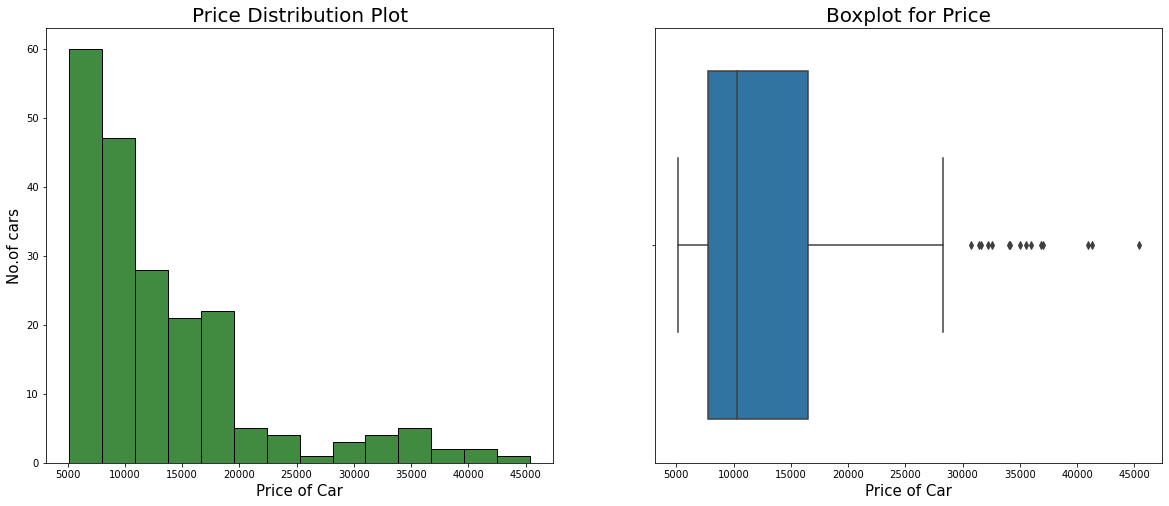

In [14]:
# plot a histogram and boxplot for 'price' variable

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.histplot(cars_data.price, color="darkgreen",)
plt.title('Price Distribution Plot',fontsize=20)
plt.xlabel("Price of Car",fontsize=15)
plt.ylabel("No.of cars",fontsize=15)


plt.subplot(1,2,2)
sns.boxplot(cars_data.price)
plt.title('Boxplot for Price',fontsize=20)
plt.xlabel("Price of Car",fontsize=15)

>- Clearly, we have a right skewed(positive skewed) distribution for 'price' column.
>- We can see that the price of most of the vehicles in our dataset is distributed between the range 5000 - 20000.
>- There is a significant difference between the mean and the median of the price distribution.
>- We have presence of outliers in our data.So we should avoid that to reduce the skewness of our data  distribution.

In [15]:
# Let's look for the skewness of our dataset

cars_data.price.skew()

1.7776781560914454

>- A slight positive right skewness is  what we are having in our dataset.So now let's deal with the outliers.


In [16]:
# making copy of the dataset

cars_data1 = cars_data

In [17]:
# removing outliers using IQR method

Q1 = np.quantile(cars_data1['price'], 0.25)
Q2 = np.quantile(cars_data1['price'], 0.50)
Q3 = np.quantile(cars_data1['price'], 0.75)

IQR = Q3 - Q1 
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

cars_data1['price'] = np.where(cars_data1['price'] > UW, UW, cars_data1['price'])
cars_data1['price'] = np.where(cars_data1['price']< LW, LW, cars_data1['price'])

In [18]:
# statistical summary after outlier removal 

cars_data1.price.describe()

count      205.000000
mean     12831.310571
std       6716.631714
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      29575.500000
Name: price, dtype: float64

Text(0.5, 0, 'Price of Car')

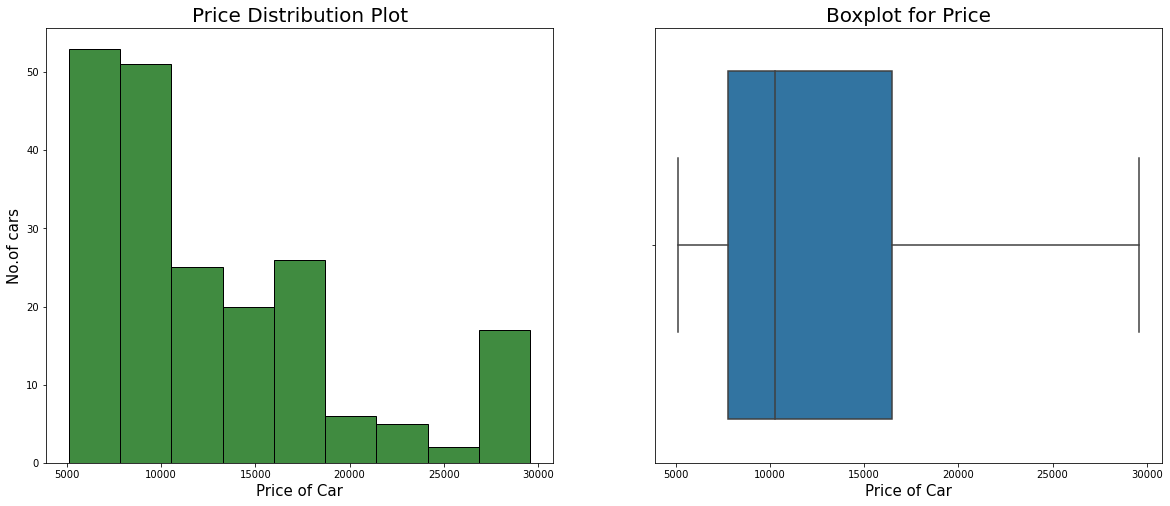

In [19]:
# plottig the graphs after removal of outliers

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.histplot(cars_data1.price, color="darkgreen",)
plt.title('Price Distribution Plot',fontsize=20)
plt.xlabel("Price of Car",fontsize=15)
plt.ylabel("No.of cars",fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(cars_data1.price)
plt.title('Boxplot for Price',fontsize=20)
plt.xlabel("Price of Car",fontsize=15)

>- Variance and difference between mean and median has decreased.
>- The skewness also decreased.

### Now let's look the independent numerical variables

In [20]:
# store all the numerical variables onto a new dataframe

numerical_cols = cars_data1.select_dtypes(include=['float64','int64'])

>- Let's plot boxplot for independent numerical variables and look for outliers.

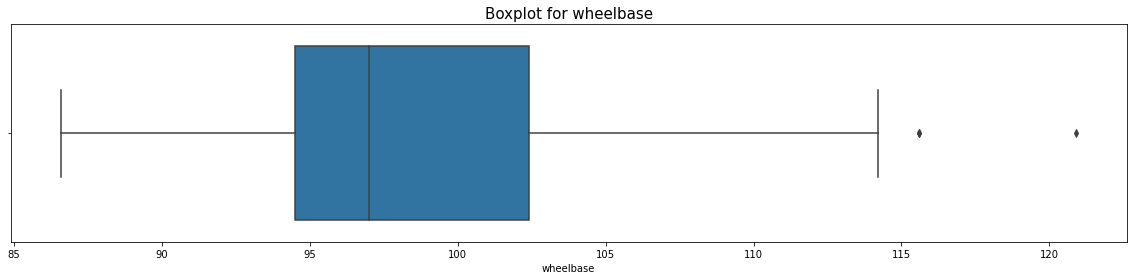

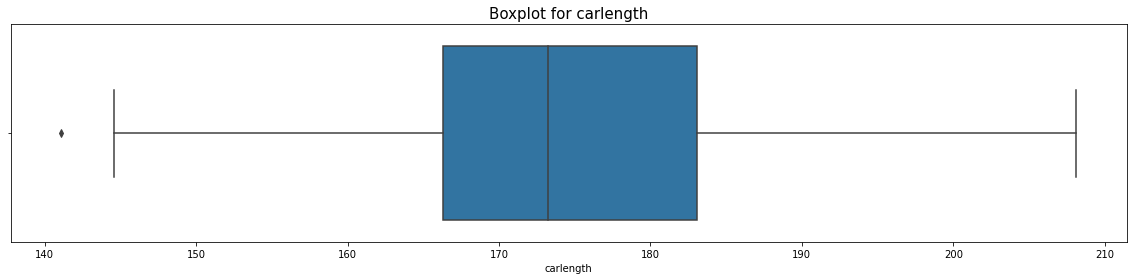

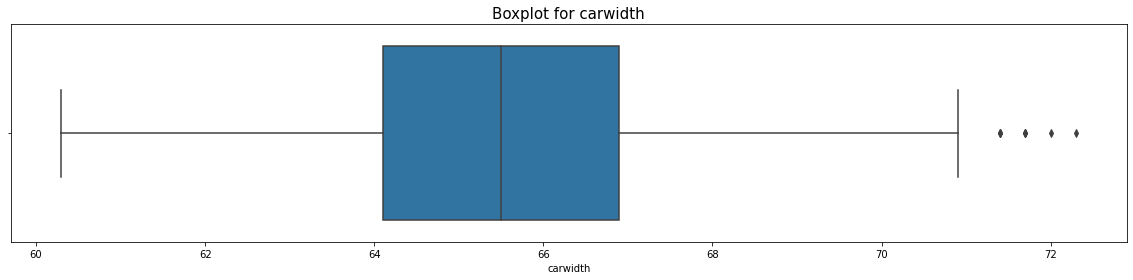

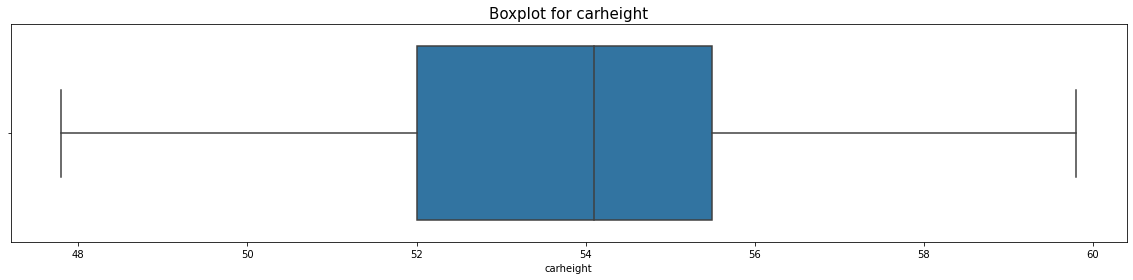

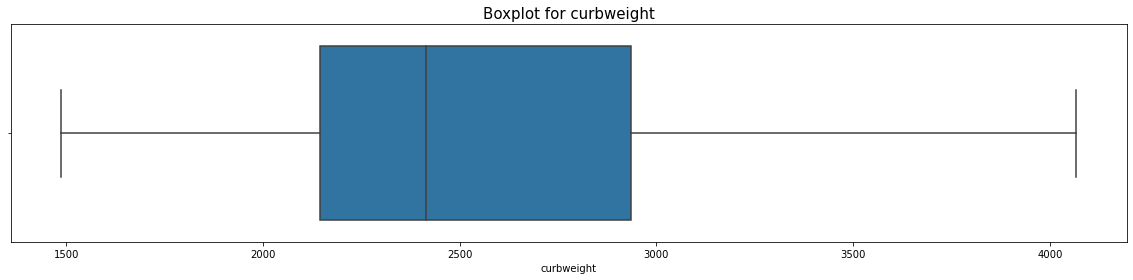

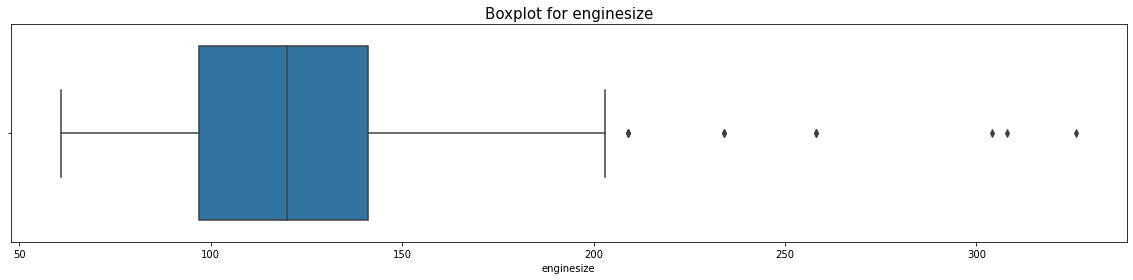

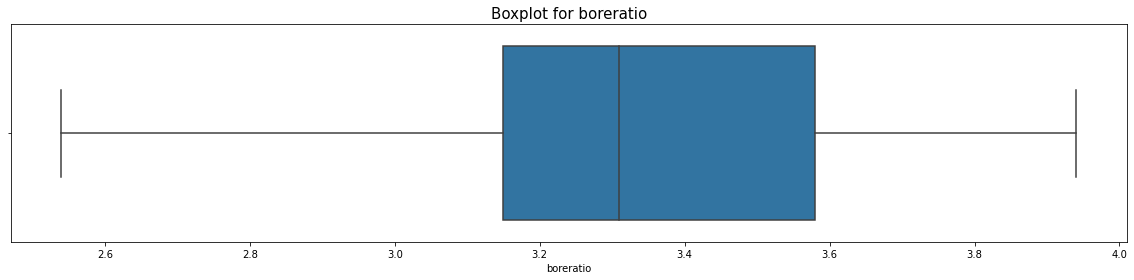

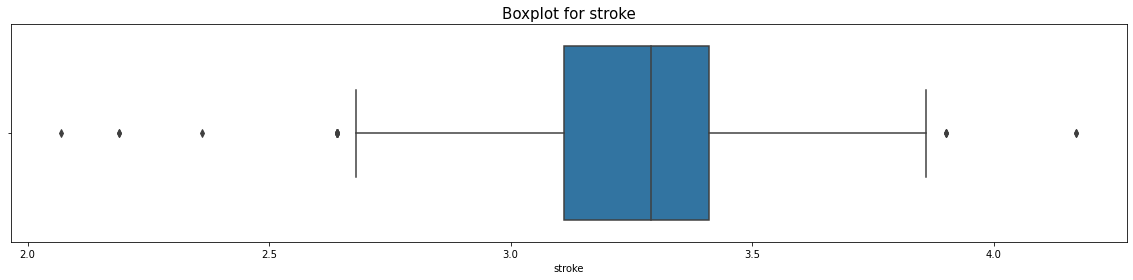

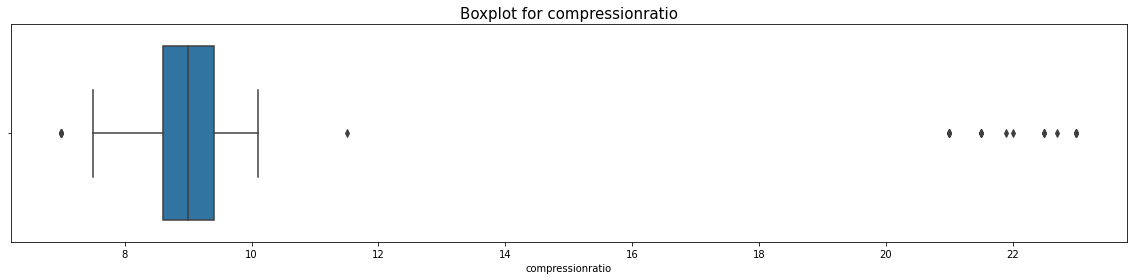

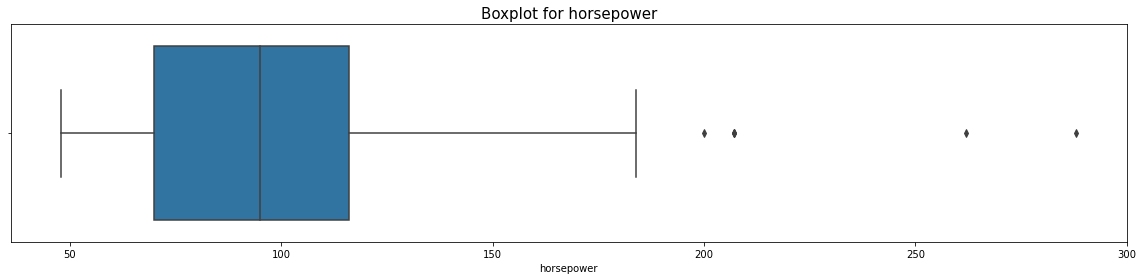

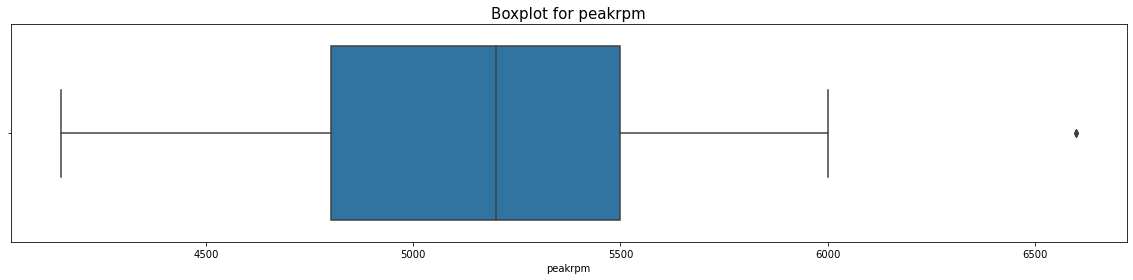

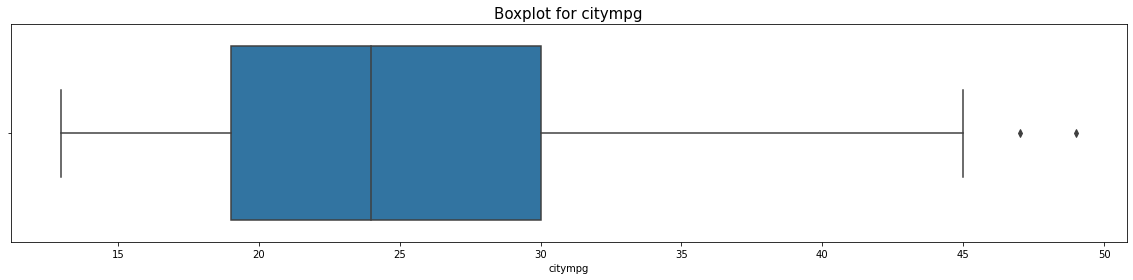

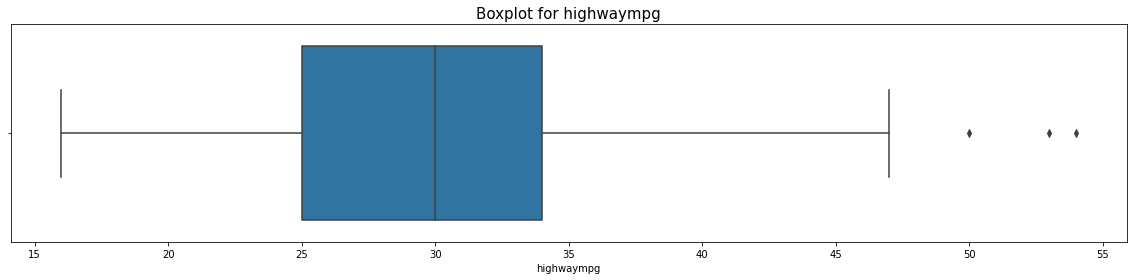

In [21]:
# plotting boxplot for independent numerical variables

for col in numerical_cols.drop('price',axis=1):
    plt.figure(figsize=(20,4))
    sns.boxplot(cars_data1[col])
    plt.title("Boxplot for "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)

>- We can see from the boxplot that there are outliers in certain columns.
>- Only boreratio, curbweight and carheight columns are not having outliers in them.

Let's treat the outliers in the independent columns.

In [22]:
# outlier removal using IQR function

for i in numerical_cols.drop(['price','curbweight','carheight','boreratio'],axis=1):
    
    iQ1 = np.quantile(cars_data1[i], 0.25)
    iQ2 = np.quantile(cars_data1[i], 0.50)
    iQ3 = np.quantile(cars_data1[i], 0.75)

    iIQR = iQ3 - iQ1 
    iUW = iQ3 + (1.5 * iIQR)
    iLW = iQ1 - (1.5 * iIQR)
    
    cars_data1[i] = np.where(cars_data1[i] > iUW, iUW, cars_data1[i])
    cars_data1[i] = np.where(cars_data1[i]< iLW, iLW, cars_data1[i])

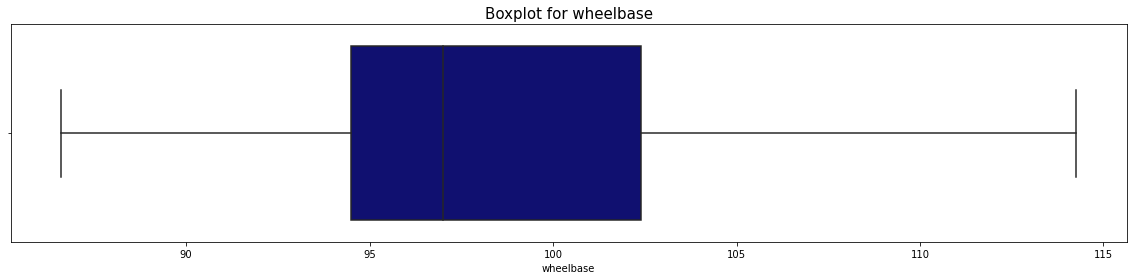

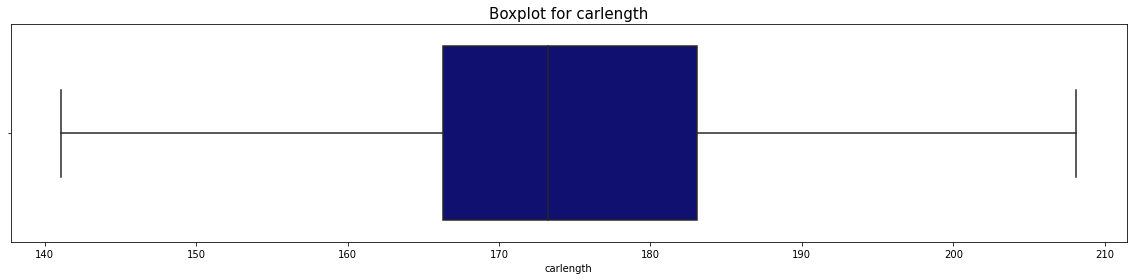

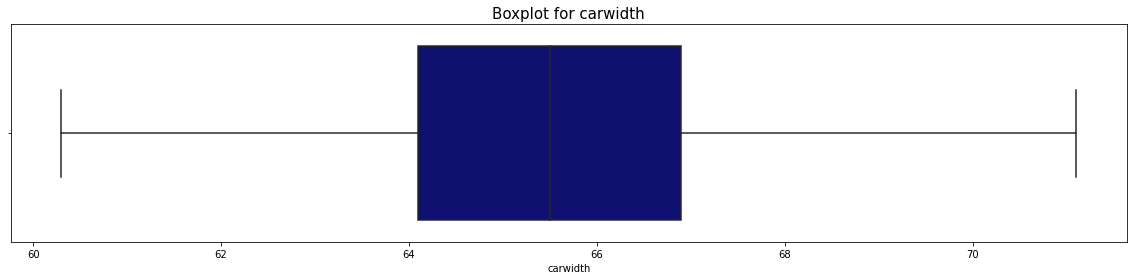

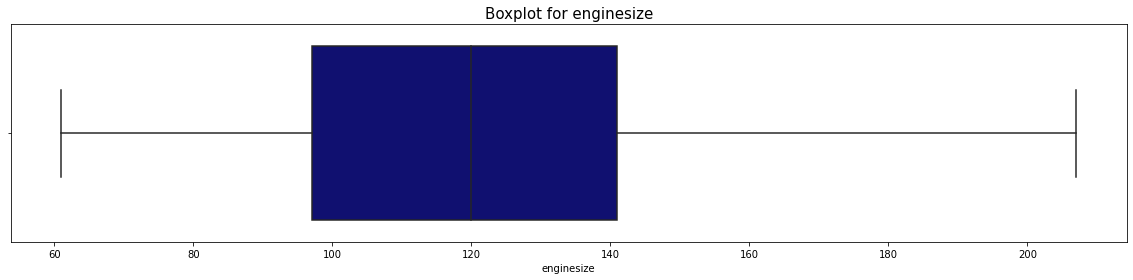

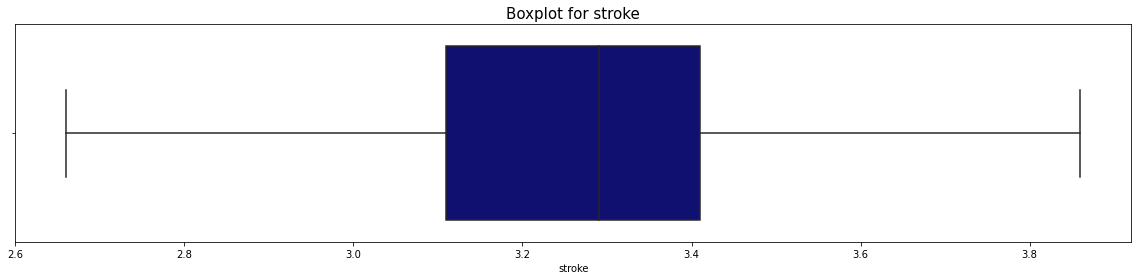

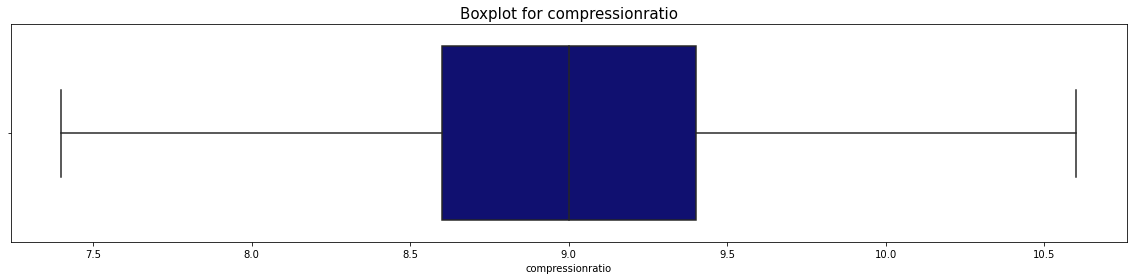

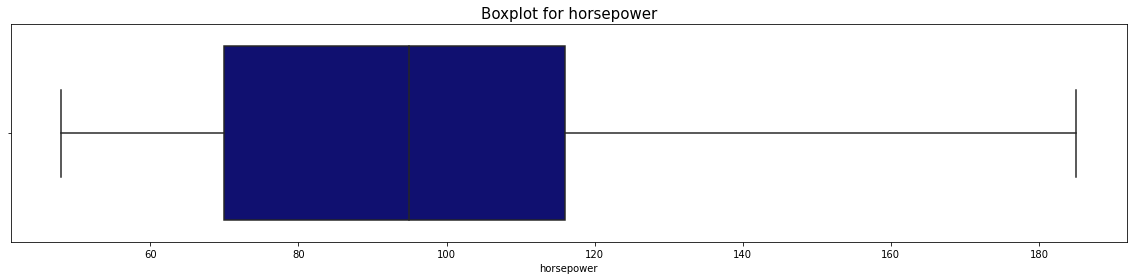

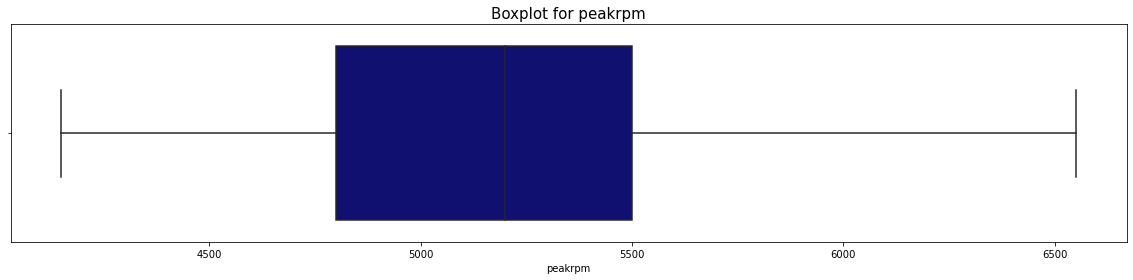

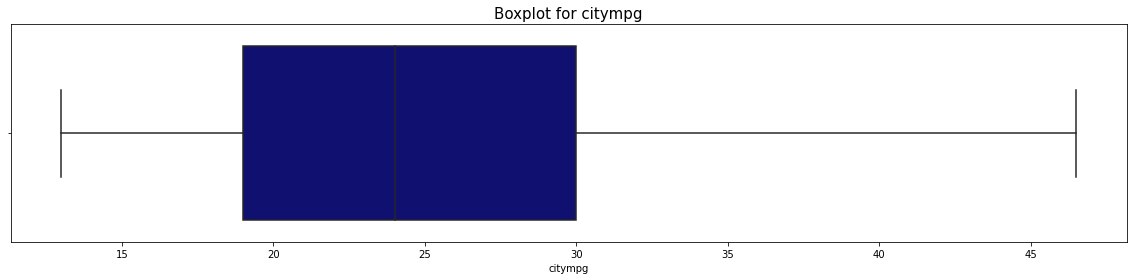

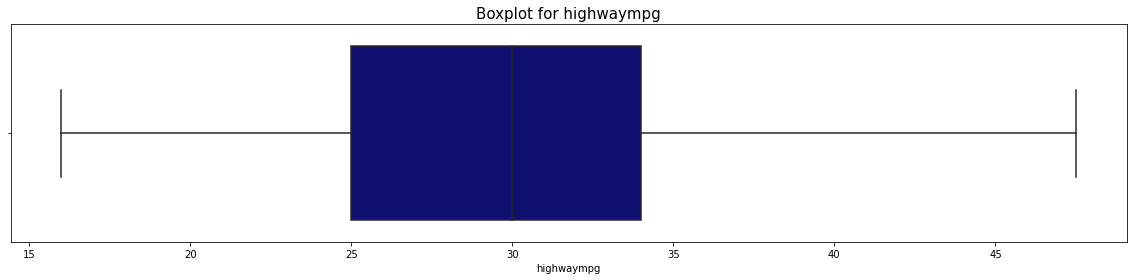

In [23]:
# boxplot after outlier removal

for col in numerical_cols.drop(['price','curbweight','carheight','boreratio'],axis=1):
    
    plt.figure(figsize=(20,4))
    sns.boxplot(cars_data1[col],color="navy")
    plt.title("Boxplot for "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)

>- All the outlier values are removed from our dataset and are a little more stable now for further analysis.
>- Now let's look for linear relationship of these independent variables with target variable.

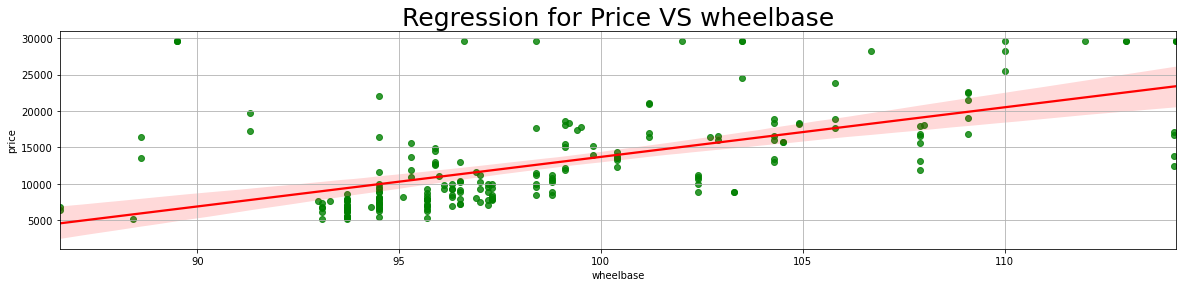

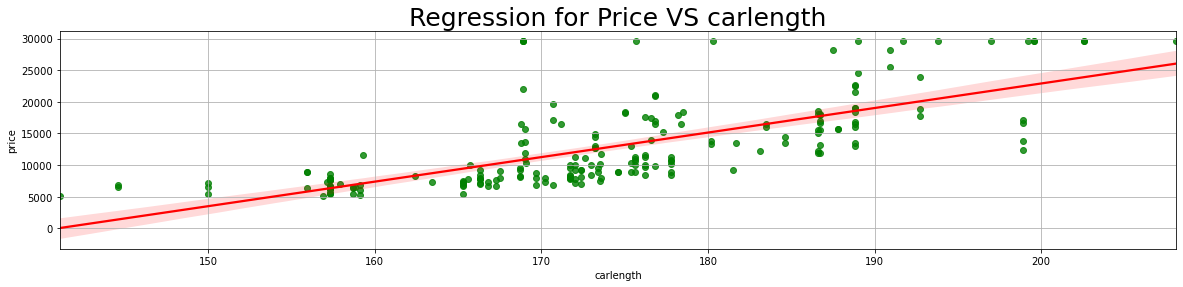

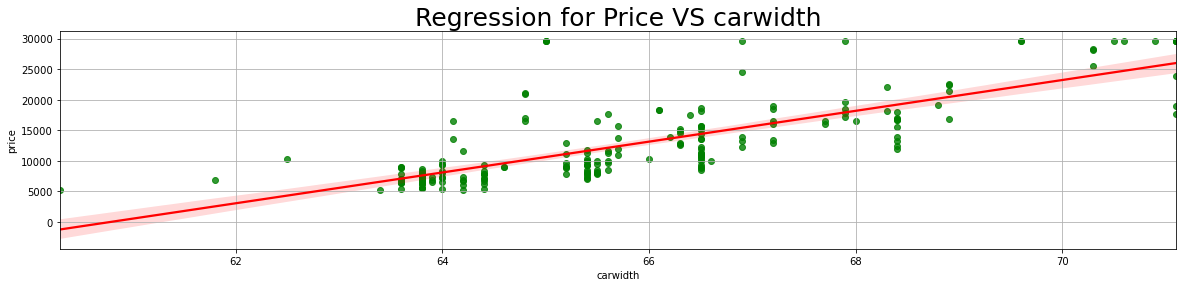

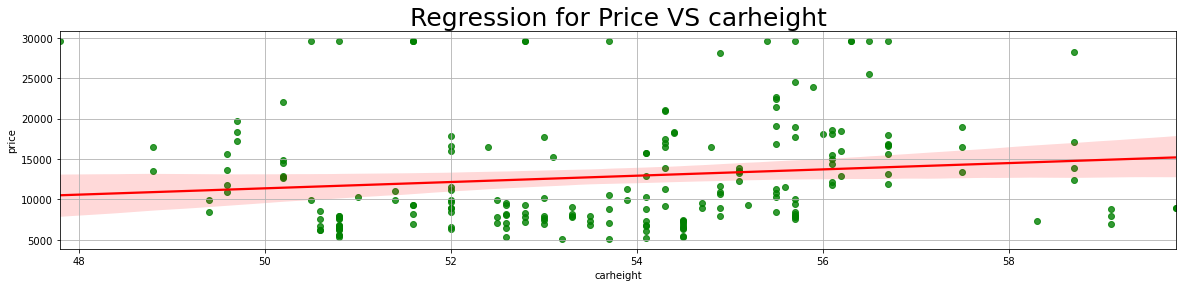

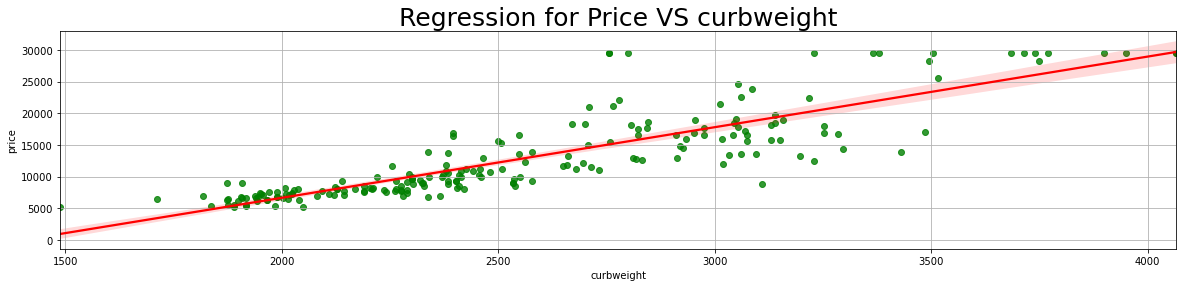

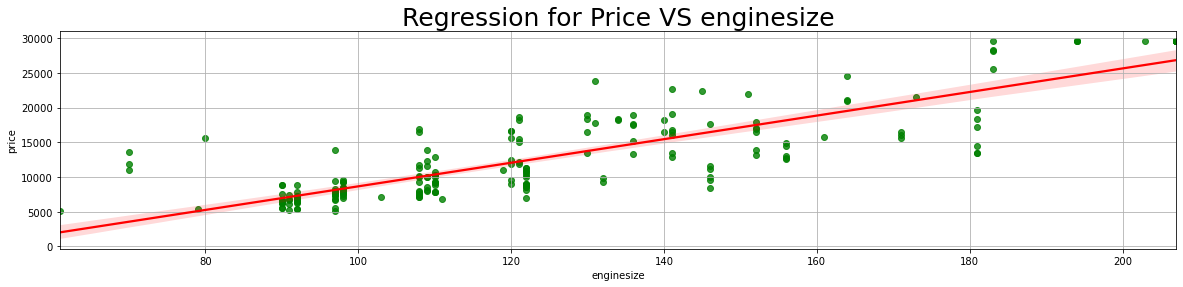

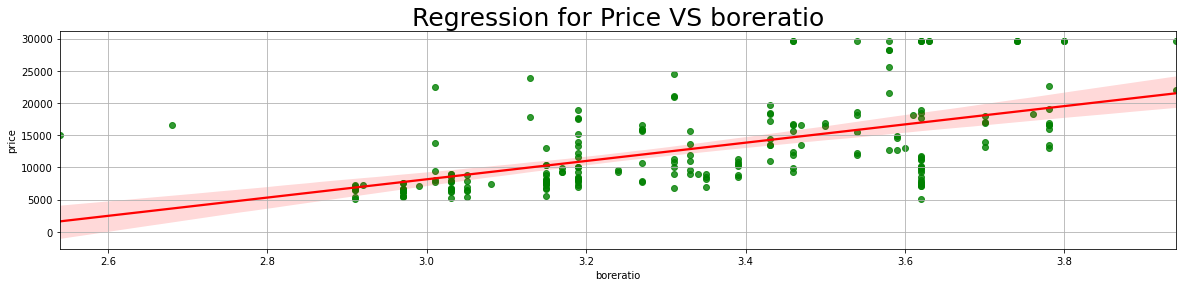

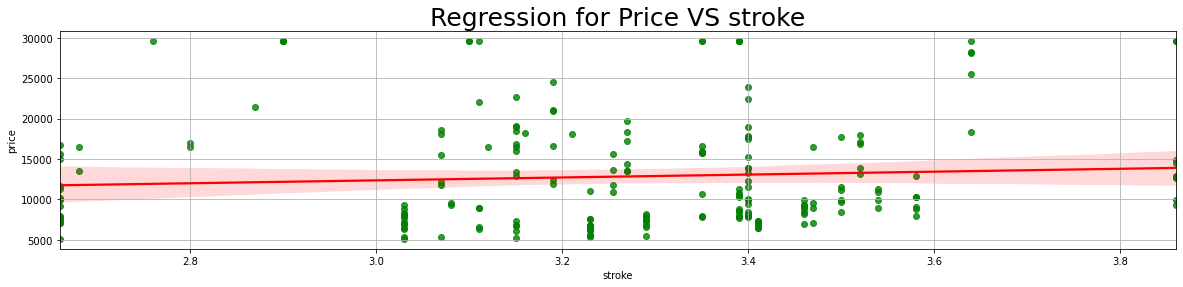

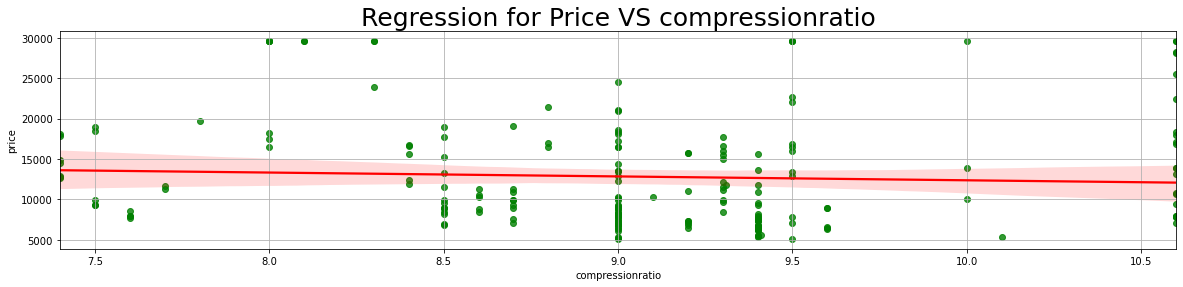

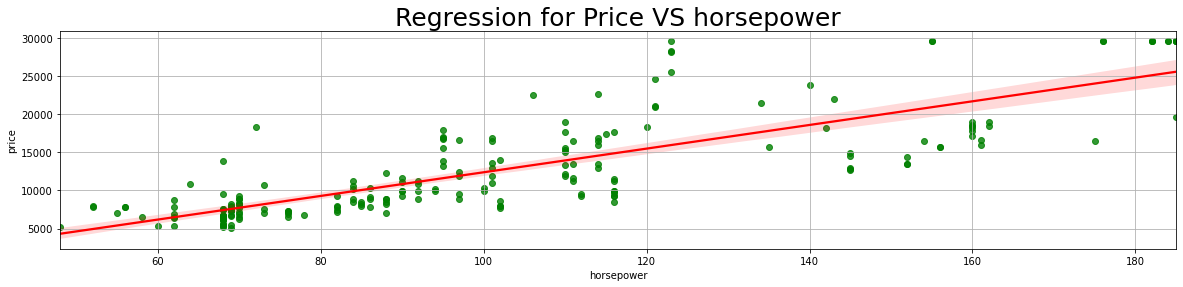

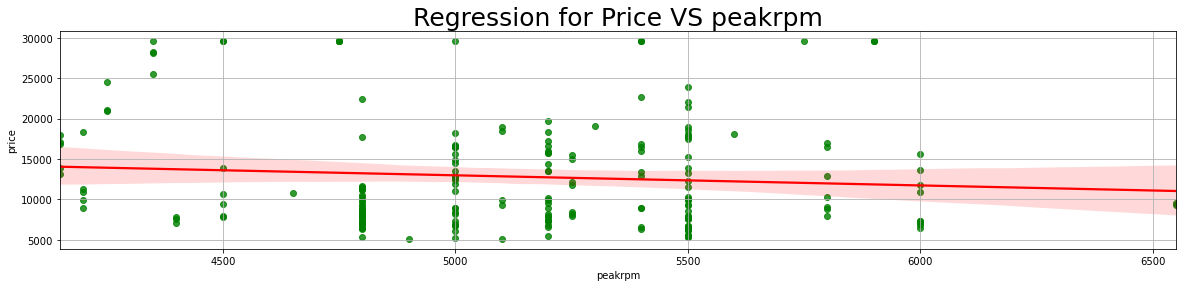

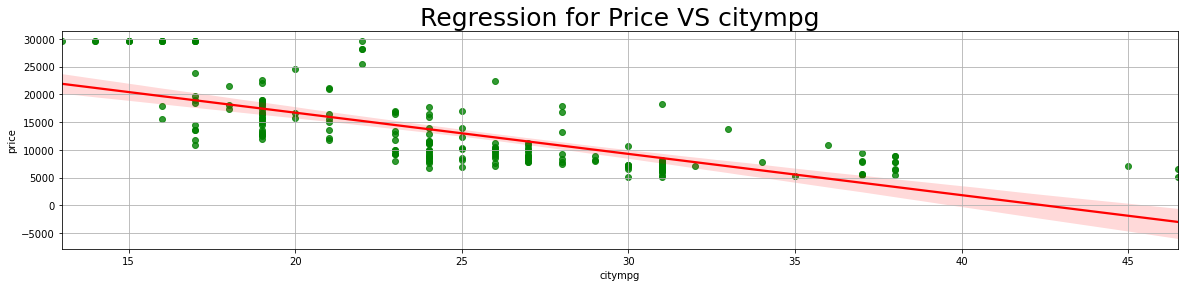

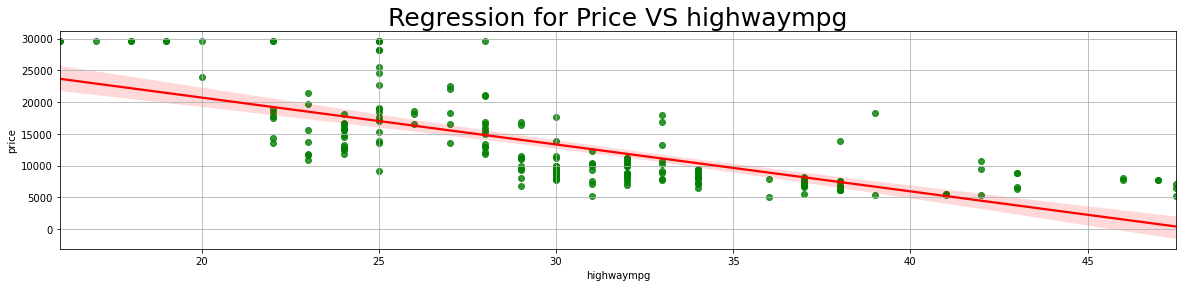

In [24]:
# plotting regression plot for analysing the relationship between numerical variables and target variables

for col in numerical_cols.drop('price',axis=1):
    
    plt.subplots(figsize=(20,4))
    sns.regplot(x=cars_data1[col],y=cars_data1['price'],scatter_kws={"color":"green"},line_kws={"color":"red"})
    plt.xlabel(col)
    plt.title('Regression for Price VS '+col,fontsize=25)
    plt.grid()

>- From the above regression plots it can be seen that almost all numerical variables have a linear relationship with price except 'stroke', 'compressionratio' and 'peakrpm'.
>- Let's leave them for now. After recursive feature elmination (RFE) if those varibales found to be important then we should give them more attention and might need to go for various transformation techniques ( eg: log transformation, square transformation etc..) .

### Now let's check for correlation among the numerical varibales

Text(0.5, 1.0, 'Correlation Among Numerical Variables')

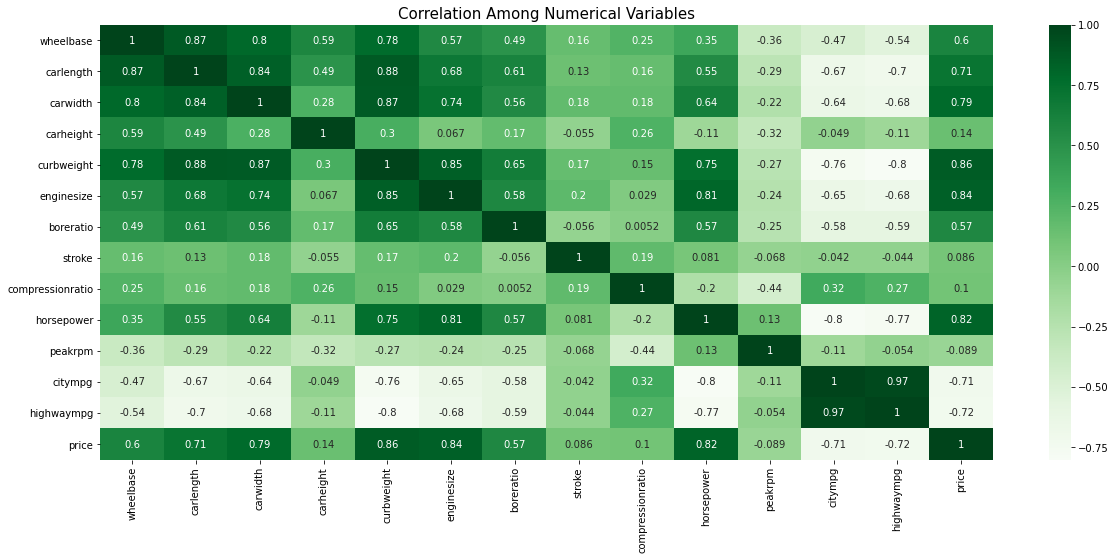

In [25]:
# plottong heatmap of all numerical variables

plt.figure(figsize=(20,8))

sns.heatmap(numerical_cols.corr(),annot=True,cmap="Greens")
plt.title('Correlation Among Numerical Variables',fontsize=15)

>- As seen from the regression plots here also we can see that the variables 'stroke', 'compressionratio', and 'peakrpm' shows a very low correlation with the target variable.
>- Along with the above variables 'carheight' is also showing a comparatively low correlation with target variable.
>- All the independent variables aren't actually independent.They shows a collinearity among themselves.
>- Multi collinearity is a threat for our model building. So we have to take care of that before we do our actual modelling.
>- We will be checking the Varibale Infation Factor(VIF) for the features and will eliminate features showing/causing high multi collinearity.

>- The 'citympg' and 'highwaympg' have a negative correlation with the 'price'. This shows that economy cars have a higher mileage while high priced cars have a lesser mileage.
>- Vehicles with higher Horsepower have a higher price as 'horsepower' is positively correlated with 'price'.
>-'wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize' and 'boreratio' have a high positive correlation with price. As these are the dimensions of the car, we can generalise that cars with higher dimensions have a higher price.
>- This might be because of the fact that as the dimensions increases the material cost as well as labour cost increases which  is reflecting in the end price of the product.

### Let's have a look at the categorical variables

Let's now look at the categorical varibales and look for imbalance in any of them.

In [26]:
# store all the categorical variables onto a new dataframe

cat_cols = cars_data1.select_dtypes(include=['object'])

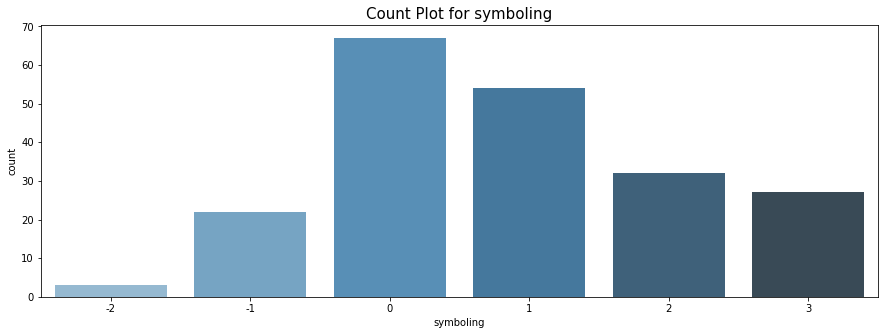

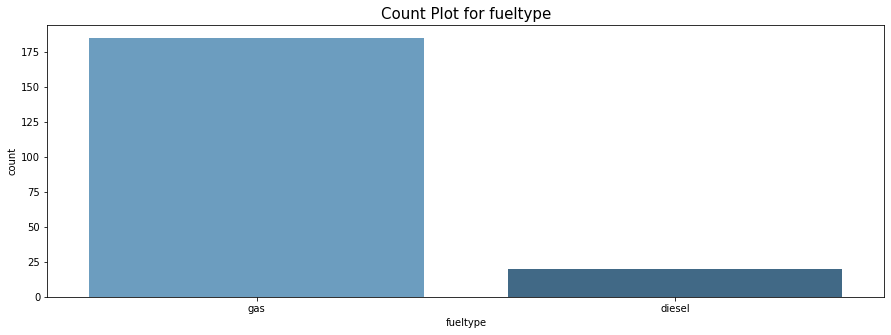

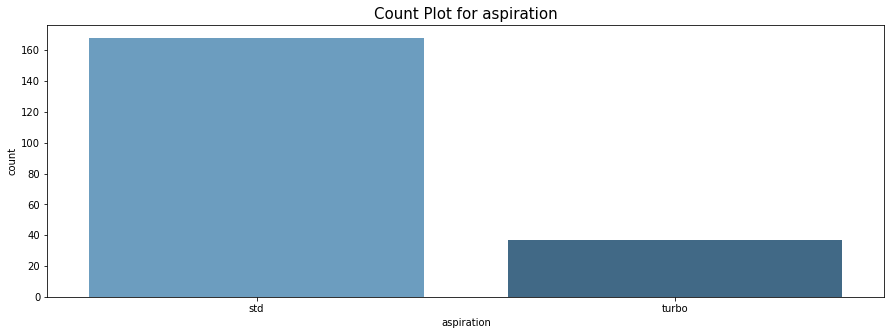

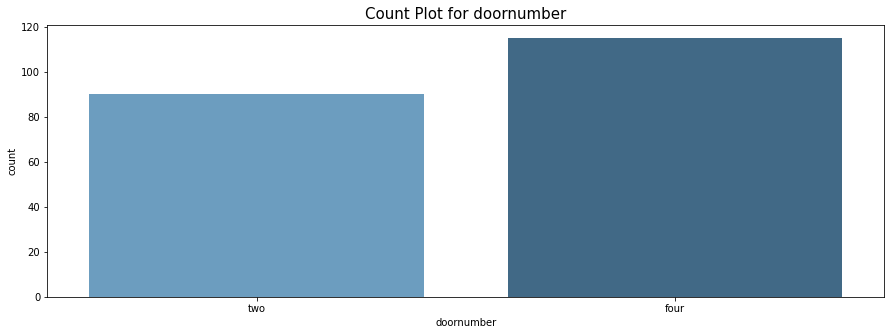

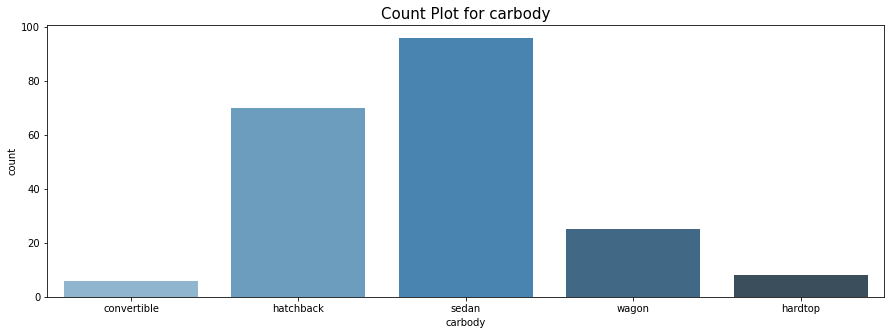

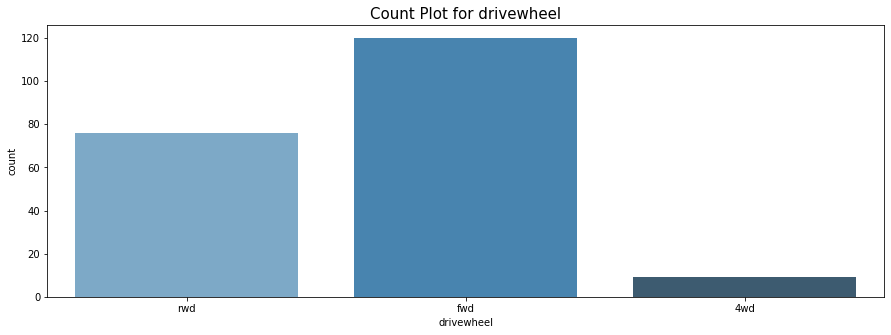

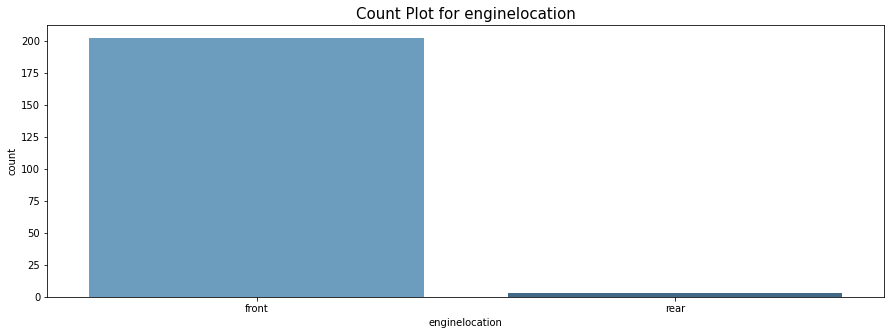

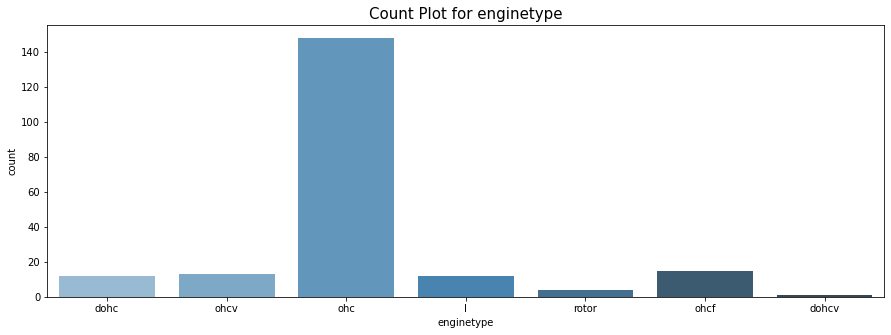

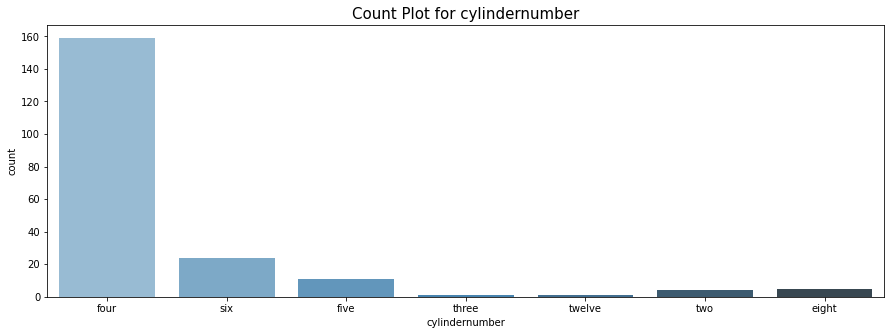

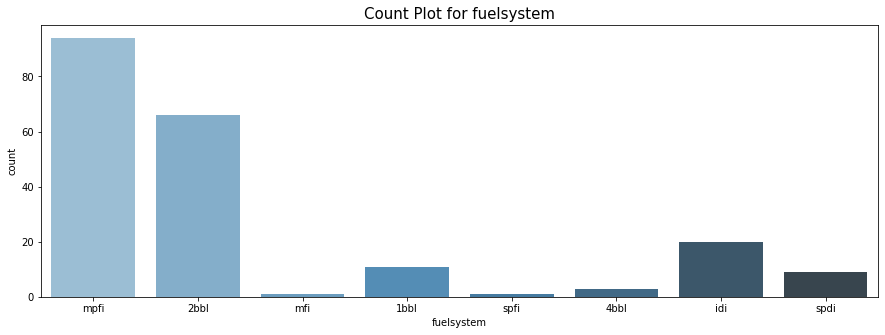

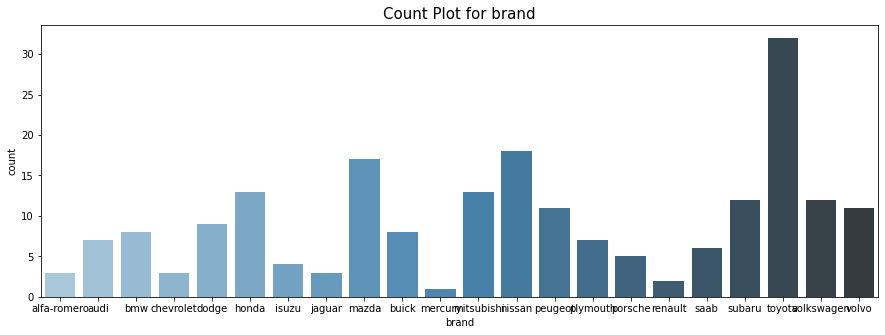

In [27]:
# Let's plot countplot for analysing the contribution of different categories in each clumn.

for colm in cat_cols :
    
    plt.subplots(figsize=(15,5))
    sns.countplot(cars_data1[colm], palette=("Blues_d"))   
    plt.title('Count Plot for '+colm,fontsize=15)

>- Most no.of cars belongs to a  category which is neither highly risky nor highly safe.People are giving more importance to other features than safety.
>- Most of the cars under consideration are having a gas fuel system.But a high imbalance exist in that column as most of the cars in our dataset have gas fuel system.
>- Most of the vehicles in our dataset have std aspiration system, which again, results in imbalanced column.
>- Both 2 doors and 4 doors are preferrd by customers.Cars with 2 doors are slightly less in number in our dataset than that with 4 doors.
>- Sedan and hatchback are the most loved models here.
>- 4wd vehicles are less in number compared to rwd and fwd.
>- Another highly unbalanced column to look for here is the 'enginelocation'.Almost all the cars in our dataset have engine located at the front.
>- Overhead camshaft(ohc) is the mostly used camshaft mechanism in the cars under consideration.
>- Most of the cars in our dataset have mpfi fuel innjection system.
>- Toyota is the most popular brand according to the available data.

In [28]:
# Let's check the percentage of different values in the 'fueltype' column.

print("\033[1m Percentage of \033[0m : \n",cars_data1.fueltype.value_counts(normalize=True)*100)

 Percentage of  : 
 gas       90.243902
diesel     9.756098
Name: fueltype, dtype: float64


In [29]:
# Let's check the percentage of different values in the 'aspiration' column.

print("\033[1m Percentage of \033[0m : \n",cars_data1.aspiration.value_counts(normalize=True)*100)

 Percentage of  : 
 std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64


In [30]:
# Let's check the percentage of different values in the 'enginelocation' column.

print("\033[1m Percentage of \033[0m : \n",cars_data1.enginelocation.value_counts(normalize=True)*100)

 Percentage of  : 
 front    98.536585
rear      1.463415
Name: enginelocation, dtype: float64


In [31]:
# Let's check the percentage of different values in the 'drivewheel' column.

print("\033[1m Percentage of \033[0m : \n",cars_data1.drivewheel.value_counts(normalize=True)*100)

 Percentage of  : 
 fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64


>- As we can see from the above results that,more than 90% of values are same 'fueltype' and 'enginelocation' column. 
>- So it's better to remove them before model building.

### Now let's look for relationship between categorical variables and target variable

>- Let's look for relationship of various categorical variables with the target varibales.
>- let's see the mean price of each category in our dataset

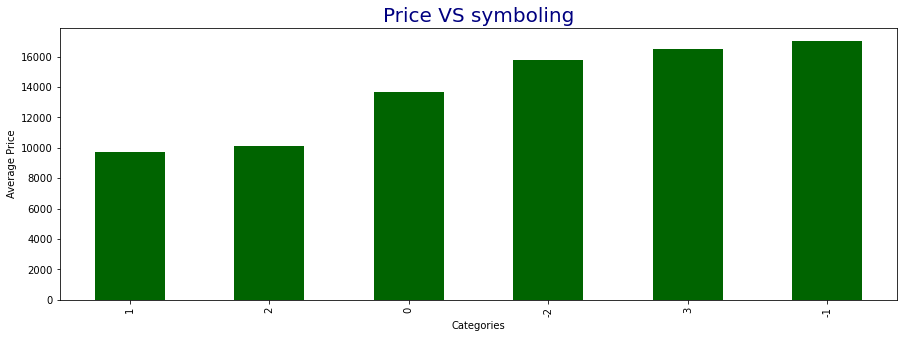

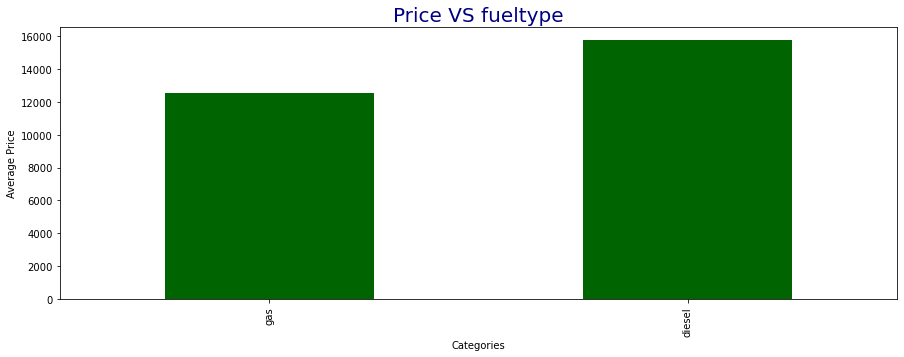

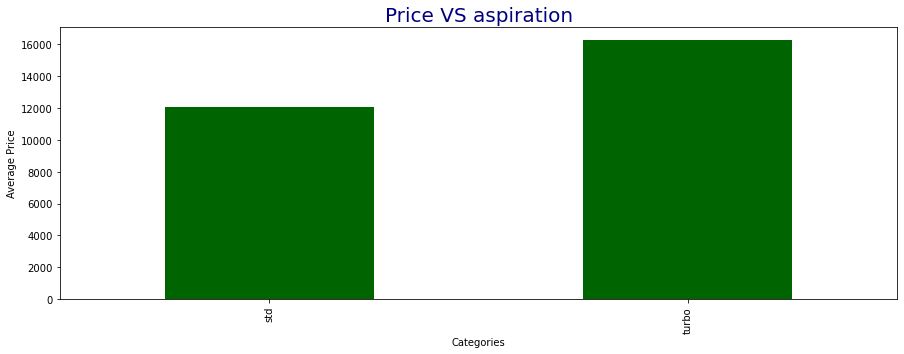

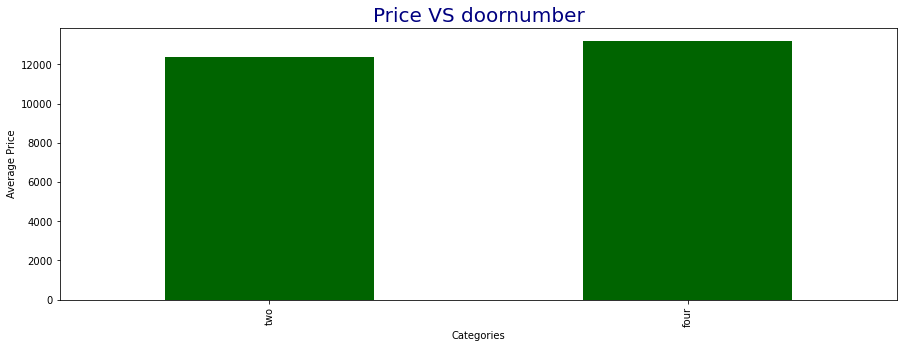

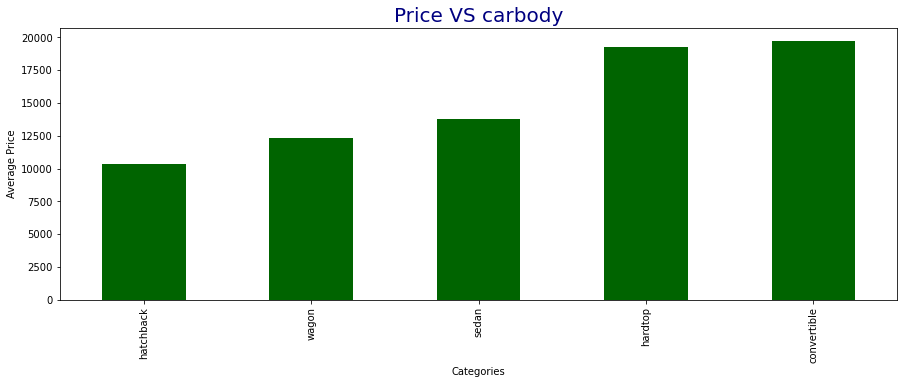

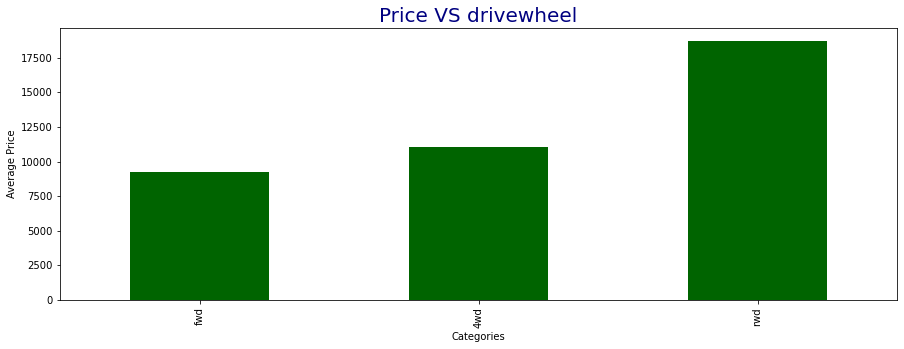

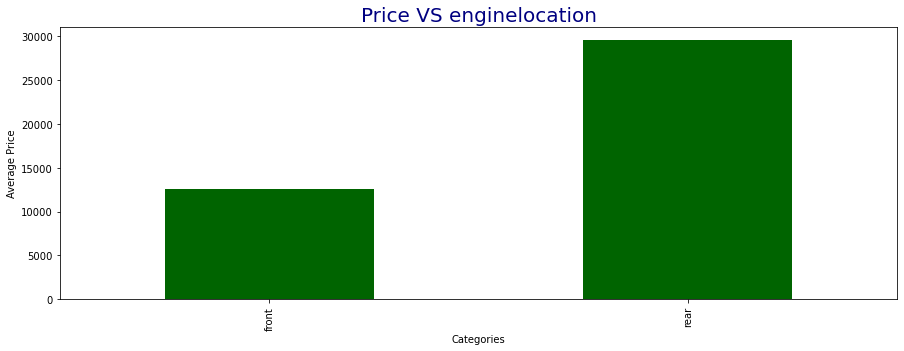

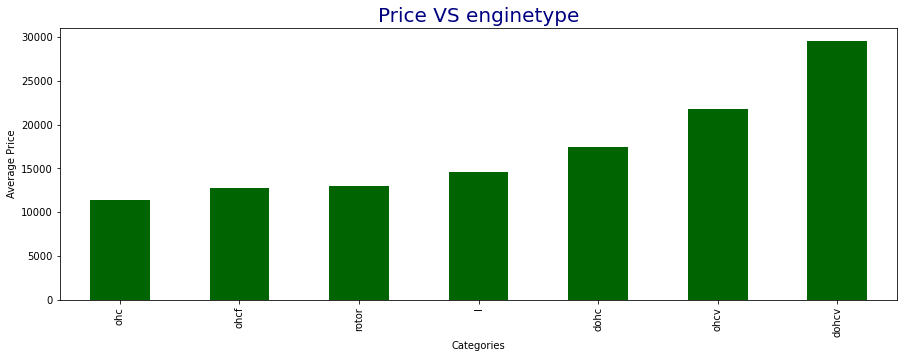

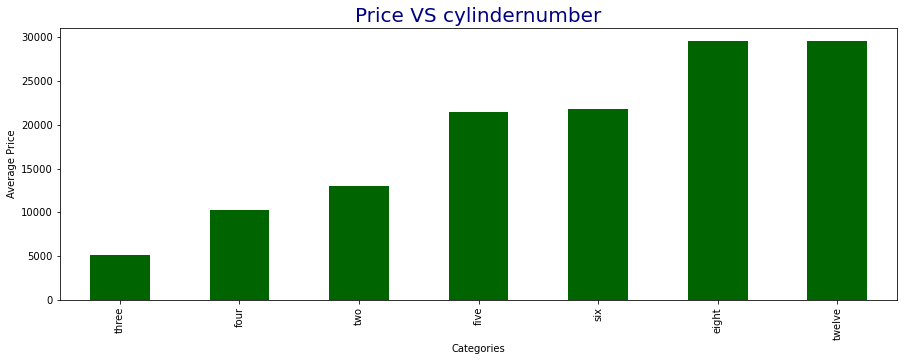

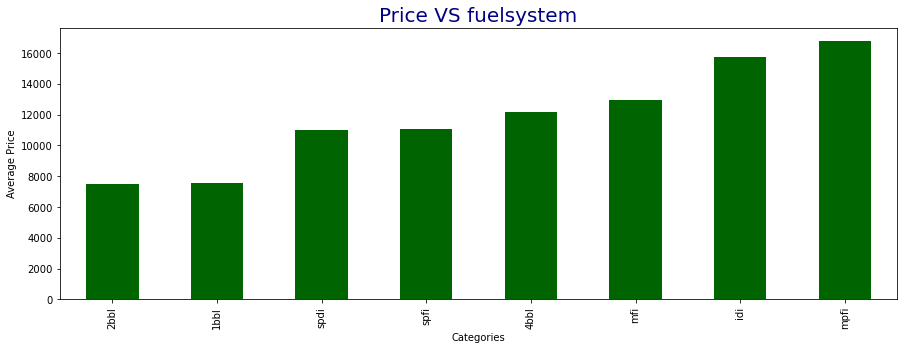

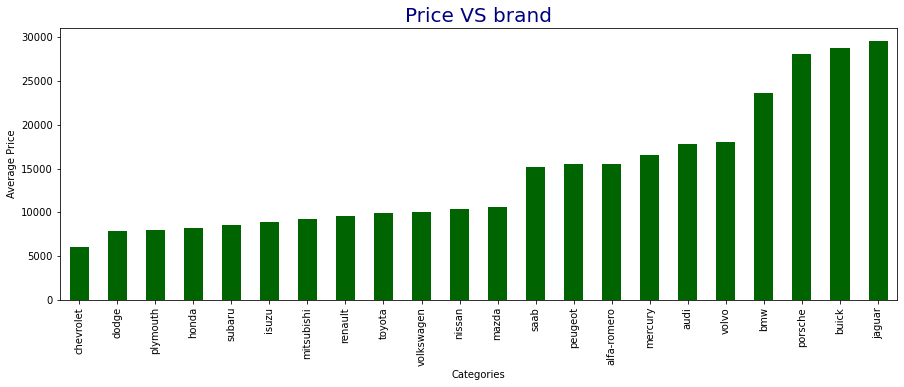

In [32]:
# grouping together different categories' column with price and plotting the relationship between them

for col in cat_cols:
    
    cat_group_with_price = cars_data1.groupby(col)['price'].mean().sort_values()
    plt.subplots(figsize=(15,5))
    cat_group_with_price.plot(kind='bar',color='darkgreen', fontsize=10)
    plt.xlabel('Categories')
    plt.ylabel('Average Price')
    plt.title('Price VS '+col,fontsize=20,color='navy')

>- We can see some sort of linear relationship for the categorical variables with target variable.
>- The less risky -1 and more risky 2 are having a similar average price.This might be because the 2 category vehicles might have introduced various other features keeping safety aside.
>- In alignment with the existing market conditions, It can be seen that diesel vehicles have higher price compared to gas fuelled vehicles.
>- Turbo aspirated vehicles have a higher average price compared to std models.
>- No.of doors have a slight/no effect on the price.
>- We can see that the vehicles with convertible hood possess higher price range in the market.
>- Rear wheel driven vehicles with engine location in the backside shows a higher price.
>- Vehicles with dual overhead camshaft valve(dohcv) have a higher price.
>- As the number of cylinders increases the price of vehicle also increases for higher number of cylinders.
>- Cars using Multi point fuel injection (mpfi) system is possessing higher average price.
>- Jaguar, Buick, Porsche and BMW are the brands with higher prices  while Chevrolet seems to be the budget friendly brand.
>- Also there is a clear price range division among the brands. Certain brands produces economy cars, while some others produce medium range cars and some brands are producing cars in higher price segment only.

##### Removing the unbalanced columns

In [33]:
# Dropping highly unbalanced columns

cars_data1.drop(['fueltype','enginelocation'],inplace=True,axis=1)

#  all updating the categorical variables

cat_cols = cars_data1.select_dtypes(include=['object'])

### Categorical Encoding

In [34]:
# Manual encoding technique is used here

symboling_encoder = { -2:5, -1:4, 0:3, 1:2, 2:1, 3:0 }

cylindernumber_encoder={'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}

cars_data1['symboling'] = cars_data1['symboling'].map(symboling_encoder)
cars_data1['cylindernumber'] = cars_data1['cylindernumber'].map(cylindernumber_encoder)


In [35]:
# one-hot encoding is used to transform all the remaining categorical varibales

cars_data2 = pd.get_dummies(cars_data1,drop_first= True)

###  Feature Scaling

Let's store the dependent and indepedent variables seperately.

In [36]:
# let's store the dependent variables into X and independent variable to y

X = cars_data2.drop('price', axis=1)
y = cars_data2['price']

Here  I am going to use minmax scalar function for scaling the features.

In [37]:
# import the scaling function minmax scaler as we are aware of the minimum and maximum values in theis dataset

from sklearn.preprocessing import MinMaxScaler

In [38]:
# transform the values

scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.        , 0.07233273, 0.41343284, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07233273, 0.41343284, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.28571429, 0.44925373, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8       , 0.81374322, 0.7119403 , ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.81374322, 0.7119403 , ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.81374322, 0.7119403 , ..., 0.        , 0.        ,
        1.        ]])

In [39]:
# create a dataframe for the scaled variables

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,0.0,0.072333,0.413433,0.351852,0.083333,0.411171,0.2,0.472603,0.664286,0.016667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.072333,0.413433,0.351852,0.083333,0.411171,0.2,0.472603,0.664286,0.016667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.4,0.285714,0.449254,0.481481,0.383333,0.517843,0.4,0.623288,0.100000,0.675000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.477396,0.529851,0.546296,0.541667,0.329325,0.2,0.328767,0.464286,0.616667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.462929,0.529851,0.564815,0.541667,0.518231,0.3,0.513699,0.464286,0.616667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Perform train test split

In [40]:
# import train tests split function

from sklearn.model_selection import train_test_split

In [41]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=50)

>- We have successfully split the data to training and testing data, 70% for training and 30% for testing.

## Pick the best variable for making a simple linear regression model

### Recursive Feature Elimination (RFE)

In [42]:
# import linear regression function 

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

## Evaluation metrics R2 value and mean square error

from sklearn.metrics import r2_score,mean_squared_error

> Let's use the RFE technique to find the best feature for doing simple linear regression

In [43]:
# recursive feature elimination :- removing weakest features until required no.of feature are reached
# Here out of our 57 features we are going to select the best 1 feature

from sklearn.feature_selection import RFE

rfe = RFE(linreg, 1)                           # running RFE with 1 variable as output
rfe = rfe.fit(X_train, y_train)

In [44]:
# rfe supporting feature

X_train.columns[rfe.support_]

Index(['curbweight'], dtype='object')

>- As per the RFE technique 'curbweight' is the feature that is best associated with 'price'.
>- So let's make a simple linear model by using curbweight alone as independent variable and price as dependent variable.

In [45]:
# setting up the dependent and independent variable for simple linear regression

X1 = pd.DataFrame(X.curbweight)
y1 = y

# Splitting the data into train and test

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7, test_size=0.3, random_state=50)

In [46]:
# Making a simple linear model
# model_SL1

LR1 = LinearRegression()
LR1.fit(X1_train, y1_train)
y1_pred = LR1.predict(X1_test)

In [47]:
m1 = LR1.coef_
C1 = LR1.intercept_
C1 = round(C1,2)

print("slope of the model = ",m1)
print("\nintercept of the model = ",C1)

slope of the model =  [11.37631947]

intercept of the model =  -15993.67


In [48]:
# equation for predicting price from curbweight

Curbweight = float(input(" Enter the expected curbweight of the vehicle in kg "))

Price = (m1 * Curbweight) + C1
Price = [ round(i,2) for i in Price ]

print( " \nRough amount you would pay for the vehicle is " ,Price,"$")

 Enter the expected curbweight of the vehicle in kg 2000
 
Rough amount you would pay for the vehicle is  [6758.97] $


In [49]:
print('R-sqaure : ',r2_score(y_true=y1_test, y_pred=y1_pred))
print('\nMean Squared error : ',mean_squared_error(y_true=y1_test, y_pred=y1_pred))
print('\nRoot Mean Squared error : ',np.sqrt(mean_squared_error(y_true=y1_test, y_pred=y1_pred)))

R-sqaure :  0.6815260466122263

Mean Squared error :  13333390.987895796

Root Mean Squared error :  3651.491611368674


Our simple linear model have an R2 score of 0.68 which is neither bad nor too good.

##### Making a simple linear model with a manually chosen feature.

In [50]:
# setting up the dependent and independent variable (horsepower) for simple linear regression

X2 = pd.DataFrame(X.horsepower)
y2 = y

# Splitting the data into train and test

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.7, test_size=0.3, random_state=50)

In [51]:
# Making a simple linear model
# model_SL2

LR2 = LinearRegression()
LR2.fit(X2_train, y2_train)
y2_pred = LR2.predict(X2_test)

In [52]:
m2 = LR2.coef_
C2 = LR2.intercept_
C2 = round(C2,2)

print("slope of the model = ",m2)
print("\nintercept of the model = ",C2)

slope of the model =  [158.11146812]

intercept of the model =  -3284.95


In [53]:
# equation for predicting price from horsepower

Horsepower = float(input(" Enter the required horsepower of the vehicle in BHP : "))

price = (m2 * Horsepower) + C2
price = [ round(i,2) for i in price ]

print( " \nRough amount you would pay for the vehicle is " ,price,"$")

 Enter the required horsepower of the vehicle in BHP : 180
 
Rough amount you would pay for the vehicle is  [25175.11] $


In [54]:
print('R-sqaure : ',r2_score(y_true=y2_test, y_pred=y2_pred))
print('\nMean Squared error : ',mean_squared_error(y_true=y2_test, y_pred=y2_pred))
print('\nRoot Mean Squared error : ',np.sqrt(mean_squared_error(y_true=y2_test, y_pred=y2_pred)))

R-sqaure :  0.6380854120807535

Mean Squared error :  15152098.47969864

Root Mean Squared error :  3892.569649948301


>- Our simple linear model have an R2 score of 0.638 which is a bit lower compared to the first model.
>- This shows that curbweight is a better predictor of price than horsepower.

## Make a multiple regression model
##### Apply feature selection approaches discussed in the class

##### Multiple linear regression

First let's select the best features for modelling using recursive feature elimination.

In [55]:
# recursive feature elimination :- removing weakest features until required no.of feature are reached
# Here out of our 57 features we are going to select the best 25 features

from sklearn.feature_selection import RFE

rfe = RFE(linreg, 25)                           # running RFE with 25 variable as output
rfe = rfe.fit(X_train, y_train)

In [56]:
# these are the rfe supported 25 variables

selected_cols = X_scaled.columns[rfe.support_]
print("RFE supporting variables : \n\n",list(selected_cols))

RFE supporting variables : 

 ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'citympg', 'highwaympg', 'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_mpfi', 'brand_bmw', 'brand_buick', 'brand_dodge', 'brand_jaguar', 'brand_mitsubishi', 'brand_peugeot', 'brand_plymouth', 'brand_porsche', 'brand_renault', 'brand_subaru', 'brand_toyota', 'brand_volkswagen']


In [57]:
# setting up the dependent and independent variables for multiple linear regression

X3 = pd.DataFrame(X_scaled[selected_cols])
y3 = y

# Splitting the data into train and test

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.7, test_size=0.3, random_state=50)

In [58]:
# Making a multiple linear model
# model_ML3

LR = LinearRegression()
LR.fit(X3_train, y3_train)
y3_pred = LR.predict(X3_test)

In [59]:
print('R-sqaure : ',r2_score(y_true=y3_test, y_pred=y3_pred))
print('\nMean Squared error : ',mean_squared_error(y_true=y3_test, y_pred=y3_pred))
print('\nRoot Mean Squared error : ',np.sqrt(mean_squared_error(y_true=y3_test, y_pred=y3_pred)))

R-sqaure :  0.9084397447710452

Mean Squared error :  3833307.7758253235

Root Mean Squared error :  1957.883493935562


>- The results are pretty convincing.
>- Let's look at the Variable Inflation Factor (VIF) and remove multi collinearity, if existing.

In [60]:
# import VIF function from statsmodels library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Variable Inflation factor for checking multi collinearity

vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,highwaympg,145.43
5,citympg,117.23
1,carlength,88.09
2,carwidth,66.36
3,curbweight,59.20
0,wheelbase,43.69
4,cylindernumber,33.76
9,enginetype_ohcf,24.37
22,brand_subaru,19.71
8,enginetype_ohc,15.45


>- A VIF value of above 5 is not good for our model.A high VIF value indicates that the independent variable is highly in correlation with other variables.
>- So let's remove variables high VIF value( variables creating high multi collinearity) step by step and remove the multi collinearity among the selected features.

In [62]:
X4 = X3.drop('highwaympg',axis=1)

In [63]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carlength,80.79
2,carwidth,66.34
3,curbweight,57.87
0,wheelbase,41.60
4,cylindernumber,33.76
8,enginetype_ohcf,24.30
21,brand_subaru,19.70
7,enginetype_ohc,14.18
5,citympg,9.05
19,brand_porsche,5.62


In [64]:
X5 = X4.drop('carlength',axis=1)

In [65]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carwidth,64.76
2,curbweight,42.90
3,cylindernumber,33.48
0,wheelbase,30.24
7,enginetype_ohcf,24.03
20,brand_subaru,19.55
6,enginetype_ohc,14.10
4,citympg,9.02
18,brand_porsche,5.53
10,fuelsystem_mpfi,4.43


In [66]:
X6 = X5.drop('carwidth',axis=1)

vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,curbweight,33.65
2,cylindernumber,30.07
0,wheelbase,24.59
6,enginetype_ohcf,22.98
19,brand_subaru,18.29
5,enginetype_ohc,13.11
3,citympg,9.02
17,brand_porsche,5.32
9,fuelsystem_mpfi,4.28
7,enginetype_ohcv,3.85


In [67]:
X7 = X6.drop('curbweight',axis=1)

vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,cylindernumber,23.92
5,enginetype_ohcf,22.97
18,brand_subaru,18.23
0,wheelbase,14.57
4,enginetype_ohc,12.92
2,citympg,8.11
16,brand_porsche,5.24
8,fuelsystem_mpfi,4.11
6,enginetype_ohcv,3.85
14,brand_peugeot,2.87


In [68]:
X8 = X7.drop('cylindernumber',axis=1)

vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,enginetype_ohcf,20.77
17,brand_subaru,17.23
3,enginetype_ohc,12.19
0,wheelbase,12.06
1,citympg,7.05
15,brand_porsche,5.23
7,fuelsystem_mpfi,3.78
13,brand_peugeot,2.86
2,enginetype_dohcv,2.10
5,enginetype_ohcv,1.83


In [69]:
X9 = X8.drop('enginetype_ohcf',axis=1)

vif = pd.DataFrame()
vif['Features'] = X9.columns
vif['VIF'] = [variance_inflation_factor(X9.values, i) for i in range(X9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,wheelbase,12.01
3,enginetype_ohc,11.78
1,citympg,6.90
6,fuelsystem_mpfi,3.77
12,brand_peugeot,2.84
4,enginetype_ohcv,1.82
8,brand_buick,1.74
16,brand_subaru,1.73
17,brand_toyota,1.50
14,brand_porsche,1.41


In [70]:
X10 = X9.drop('wheelbase',axis=1)

vif = pd.DataFrame()
vif['Features'] = X10.columns
vif['VIF'] = [variance_inflation_factor(X10.values, i) for i in range(X10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,enginetype_ohc,7.98
0,citympg,6.90
5,fuelsystem_mpfi,2.69
3,enginetype_ohcv,1.75
15,brand_subaru,1.50
16,brand_toyota,1.48
13,brand_porsche,1.39
11,brand_peugeot,1.36
7,brand_buick,1.26
1,enginetype_dohcv,1.25


In [71]:
X11 = X10.drop('enginetype_ohc',axis=1)

vif = pd.DataFrame()
vif['Features'] = X11.columns
vif['VIF'] = [variance_inflation_factor(X11.values, i) for i in range(X11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,fuelsystem_mpfi,2.06
0,citympg,1.98
15,brand_toyota,1.48
2,enginetype_ohcv,1.47
12,brand_porsche,1.36
1,enginetype_dohcv,1.25
16,brand_volkswagen,1.24
6,brand_buick,1.19
5,brand_bmw,1.18
14,brand_subaru,1.13


>- After eliminating multi collinearity we are left with best 17 features for model building.
>- Let's make a model using these features

## Final model should be interpretable
##### What is your understanding of the factors that drive price?

##### Performing the final train test split

In [72]:
# Splitting the data into train and test

X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y, train_size=0.7, test_size=0.3, random_state=50)

In [73]:
# Making a multiple linear model
# model_ML4

LR = LinearRegression()
LR.fit(X11_train, y11_train)
y11_pred = LR.predict(X11_test)

In [74]:
# Y- intercept of the model 

C = LR.intercept_
C = round(C,2)

# slope of each variable

m = LR.coef_
m = [ round(i,2) for i in m ]

# List of each variables in the model

key_list = list(vif.Features)

# Making a dictionary of each variable and it's coefficent in the linear regression equation

coeff_dict = dict(zip(key_list,m))

print("slope of the model = \n\n",coeff_dict)
print("\nintercept of the model = ",C2)

slope of the model = 

 {'fuelsystem_mpfi': -12675.24, 'citympg': 2266.92, 'brand_toyota': 222.45, 'enginetype_ohcv': -2269.41, 'brand_porsche': 2070.56, 'enginetype_dohcv': 7574.54, 'brand_volkswagen': 13490.59, 'brand_buick': -2652.87, 'brand_bmw': 11581.44, 'brand_subaru': -2989.1, 'brand_dodge': 1957.72, 'brand_peugeot': -3254.59, 'brand_mitsubishi': 10560.84, 'brand_plymouth': -4882.54, 'brand_jaguar': -3253.14, 'brand_renault': -1790.29, 'enginetype_rotor': -2229.5}

intercept of the model =  -3284.95


In [75]:
print('R-sqaure : ',r2_score(y_true=y11_test, y_pred=y11_pred))
print('\nMean Squared error : ',mean_squared_error(y_true=y11_test, y_pred=y11_pred))
print('\nRoot Mean Squared error : ',np.sqrt(mean_squared_error(y_true=y11_test, y_pred=y11_pred)))

R-sqaure :  0.8581149532144973

Mean Squared error :  5940230.854055215

Root Mean Squared error :  2437.2588812137324


>- We got a model with an R squared value of 85% which indicated that our model is a fairly good one.
>- The RMSE is also in a tolerable level. 

##### Plotting the Predicted and Actual Values

Let's have a look at how the predicted and actual values are associated.

Text(0.5, 1.0, 'Price: Actual vs Predicted')

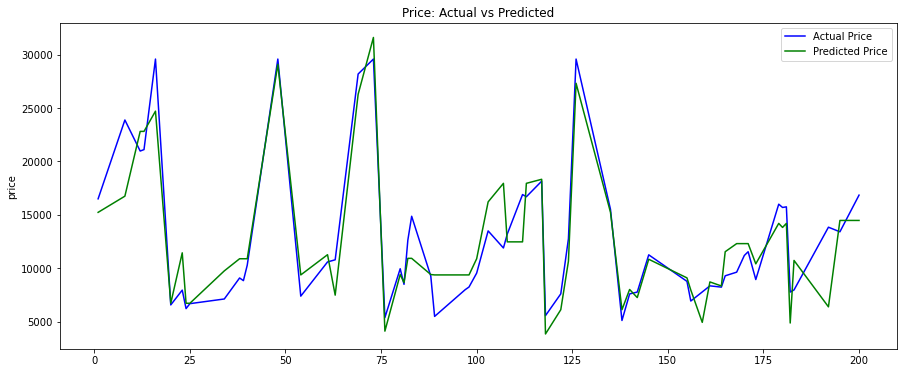

In [76]:
# Let's plot the predicted and actual values 

fig, ax=plt.subplots(figsize=(15,6))

sns.lineplot(x=y11_test.index,y=y11_test,label='Actual Price',color='blue',ax=ax)
sns.lineplot(x=y11_test.index,y=y11_pred,label='Predicted Price',color='green',ax=ax)
ax.set_title('Price: Actual vs Predicted')

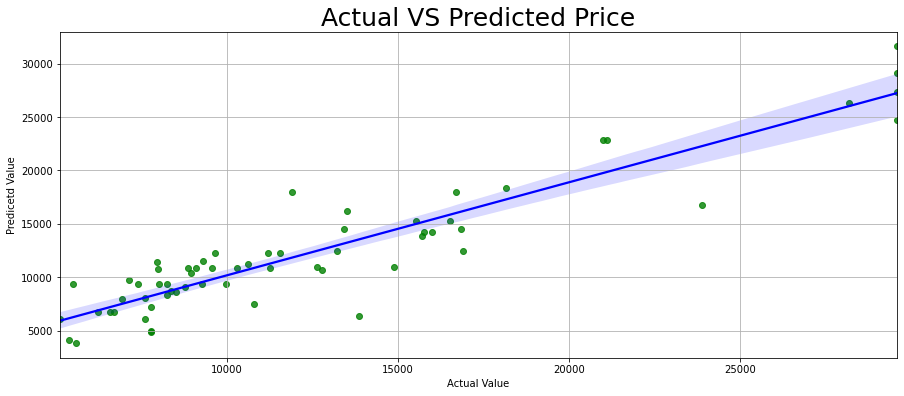

In [77]:
# Plotting the predicted and actual values and looking for linear association among them.

plt.subplots(figsize=(15,6))

sns.regplot(x=y11_test,y=y11_pred,scatter_kws={"color":"green"},line_kws={"color":"blue"})
plt.xlabel('Actual Value')
plt.ylabel('Predicetd Value')
plt.title('Actual VS Predicted Price',fontsize=25)
plt.grid()

>- From both the graphs it is clear that the actual and predicted values shows a good association.
>- The graphs shows that the model isn't over fitted as well.

In [78]:
# Features that are under consideration in the final model

list(vif.Features)

['fuelsystem_mpfi',
 'citympg',
 'brand_toyota',
 'enginetype_ohcv',
 'brand_porsche',
 'enginetype_dohcv',
 'brand_volkswagen',
 'brand_buick',
 'brand_bmw',
 'brand_subaru',
 'brand_dodge',
 'brand_peugeot',
 'brand_mitsubishi',
 'brand_plymouth',
 'brand_jaguar',
 'brand_renault',
 'enginetype_rotor']

>- These 17 variables are the major factors that are used for predicting the price using the final model.
>- 'brand' has a huge influence on the price of the car as brand value is something that does matter.
>- Type of the engine used, the mileage of the car and the fuel system are the other major factors that dominates in contributing to car price prediction.

##### Making a model with all available variables

In [79]:
# Making a model with all features to understand the performance.
# model_X

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [80]:
print('R-sqaure : ',r2_score(y_true=y_test, y_pred=y_pred))
print('\nMean Squared error : ',mean_squared_error(y_true=y_test, y_pred=y_pred))
print('\nRoot Mean Squared error : ',np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

R-sqaure :  0.9229833357251941

Mean Squared error :  3224418.469503998

Root Mean Squared error :  1795.6665808284115


>- We got a model with very good R2 score and RMSE score. But there's a chance that the model is overfitted.
>- Also many of the independent variables are correlated which each other which paves way for multi collinearity.

Text(0.5, 1.0, 'Price: Actual vs Predicted')

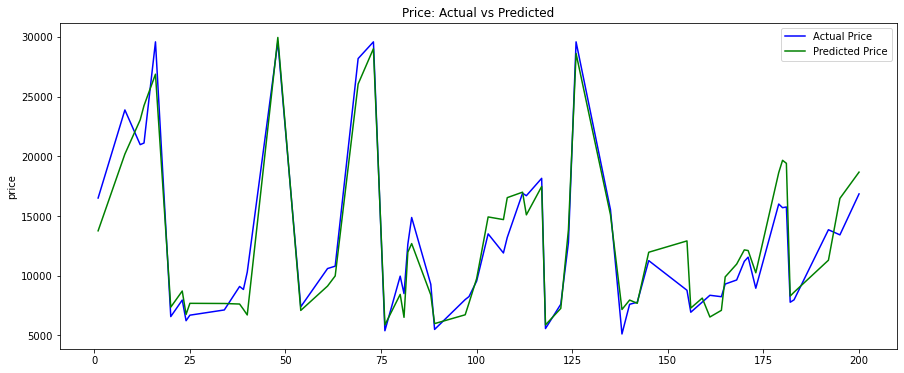

In [81]:
# Let's look for the association of predicted and actual values

fig, ax=plt.subplots(figsize=(15,6))

sns.lineplot(x=y_test.index,y=y_test,label='Actual Price',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred,label='Predicted Price',color='green',ax=ax)
ax.set_title('Price: Actual vs Predicted')


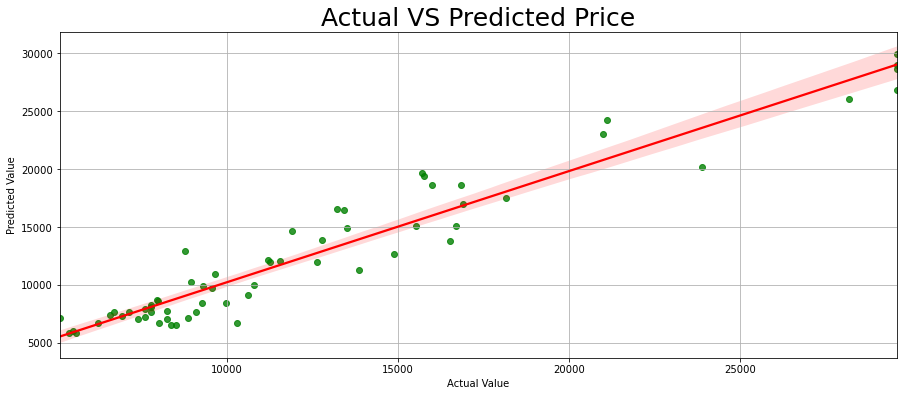

In [82]:
# Plotting the predicted and actual values and looking for linear association among them.

plt.subplots(figsize=(15,6))

sns.regplot(x=y_test,y=y_pred,scatter_kws={"color":"green"},line_kws={"color":"red"})
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual VS Predicted Price',fontsize=25)
plt.grid()

>- From both the graphs the model seems to be slightly overfitted.

In [83]:
# Variable Inflation factor for checking multi collinearity

vif_X = pd.DataFrame()
vif_X['Features'] = X.columns
vif_X['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_X['VIF'] = round(vif_X['VIF'], 2)
vif_X = vif_X.sort_values(by = 'VIF', ascending = False)
vif_X

,Features,VIF
3,carwidth,8184.83
1,wheelbase,5348.92
2,carlength,4454.42
4,carheight,2647.83
5,curbweight,1284.04
9,stroke,1233.25
8,boreratio,993.36
10,compressionratio,883.12
14,highwaympg,761.80
12,peakrpm,670.77


>- A very high level of multi collinearity is existing between many variables.
>- So a model with all the variables is not a good choice here, even though it gives a higher R squared value.

$Predictive$ $modelling$ $By$ $Alwin$ $Mathew$